# Stanford CME 241 (Winter 2021) - Assignment 2

In [74]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

### Snakes & Ladders (single-player game)

#### State Space & Transition Probabilities

We can model the structure of state space $V^k$ with $k = 0, 1, 2, ...100$ as a 1-D vector and the transition probabilities $T$ as a 2-D matrix, which has dimensions $101 \times 101$ with the row # $i = 0, 1, 2, ... 100$ and the column # $j = 0, 1, 2, ... 100$. Without snakes and ladders, the transition matrix can be simply shown as below:
\begin{bmatrix}
0 & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & 0 & 0 & 0 & ... & 0 \\
0 & 0 & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & 0 & 0 & ... & 0 \\
...
\end{bmatrix}

Thus, $V^{K+1} = V^k \times T $, where the probability of the next state is given by the dot product of the current state and the transition matrix.

#### Transition Map & Probability Distribution

In [122]:
snakes_and_ladders = {}
snakes = {31: 6, 38: 1, 49: 8, 53: 17, 65: 14, 70: 34, 76: 37, 82: 63, 88: 50, 94: 42, 98: 54}
ladders = {3: 39, 7: 48, 12: 51, 20: 41, 25: 57, 28: 35, 45: 74, 60: 85, 67: 90, 69: 72, 77: 82}
snakes_and_ladders.update(snakes)
snakes_and_ladders.update(ladders)
print(snakes_and_ladders)

{31: 6, 38: 1, 49: 8, 53: 17, 65: 14, 70: 34, 76: 37, 82: 63, 88: 50, 94: 42, 98: 54, 3: 39, 7: 48, 12: 51, 20: 41, 25: 57, 28: 35, 45: 74, 60: 85, 67: 90, 69: 72, 77: 82}


In [98]:
def SnakesAndLadders_markov_matrix(max_roll=6):
    """
    Create a markov transition natrix
    """    
    trans = np.zeros((101, 101))
    for i in range(101):
        trans[i + 1:i + 1 + max_roll, i] = 1. / max_roll

    trans[range(101), range(101)] += 1 - mat.sum(0)

    sl_trans = np.zeros((101, 101))
    index = [snakes_and_ladders.get(i, i) for i in range(101)]
    sl_trans[index, range(101)] = 1
    return np.dot(sl_trans, trans)

def SnakesAndLadders_probability(n):
    """
    Compute the state after n moves
    """
    mat = SnakesAndLadders_markov_matrix()
    v_0 = [1, *np.zeros(100)]
    return np.dot(np.linalg.matrix_power(mat, n), v_0)

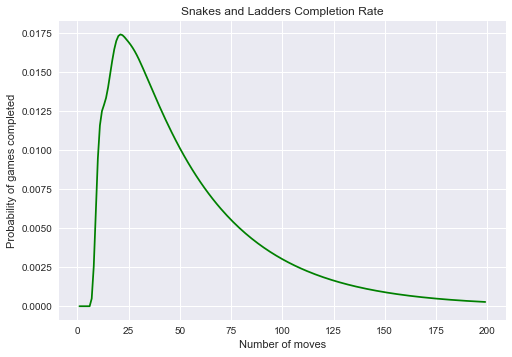

In [116]:
probs = [SnakesAndLadders_probability(i)[-1] for i in range(200)]

fig, ax = plt.subplots()
ax.plot(np.arange(1, 200), np.diff(probs),  color='green')
plt.title('Snakes and Ladders Completion Rate')
ax.set_xlabel('Number of moves')
ax.set_ylabel('Probability of games completed')
plt.show()

#### Expected number of dice rolls

In [104]:
def simulate_SnakesAndLadders(max_roll=6):
    """
    Snakes and Ladders Game Simulation
    """
    position = 0
    num_moves = 0
    while position < 100:
        num_moves += 1
        roll = random.randrange(1, max_roll)
        
        if position + roll > 100:
            continue
            
        position += roll
        
        position = snakes_and_ladders.get(position, position)
    return num_moves

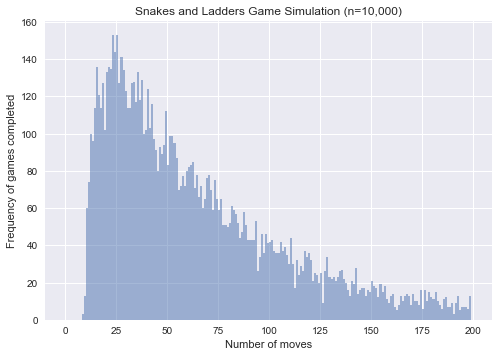

In [119]:
games_simulation = [simulate_SnakesAndLadders() for i in range(10000)]

plt.hist(games_simulation, bins=range(200), align='mid', alpha=0.5)
plt.title('Snakes and Ladders Game Simulation (n=10,000)')
plt.xlabel('Number of moves')
plt.ylabel('Frequency of games completed')
plt.show()

In [120]:
# Expected number of moves/dice rolls to finish the game
moves = np.arange(1, len(probs))
np.dot(np.diff(probs), moves)

52.092570847209366

### Frog Puzzle

The problem can be set up using the states $ x = 0, 1, 2, ... n$, where state $x = 0$ is the frog on the river-bank and the remaining states are for the frog being on lily-pads $1, 2, ... n$. The process can be modeled as a markov process with $ (n+1) \times (n+1) $ transition probability matrix shown as below:
\begin{bmatrix}
0 & \frac{1}{n} & \frac{1}{n} & ... & \frac{1}{n} & \frac{1}{n} & \frac{1}{n} \\
0 & 0 & \frac{1}{n-1} & ... & \frac{1}{n-1} & \frac{1}{n-1} & \frac{1}{n-1} \\
0 & 0 & 0 & ... & \frac{1}{n-2} & \frac{1}{n-2} & \frac{1}{n-2} \\
... \\
0 & 0 & 0 & ... & 0 & \frac{1}{2} & \frac{1}{2} \\
0 & 0 & 0 & ... & 0 & 0 & 1 \\
0 & 0 & 0 & ... & 0 & 0 & 1
\end{bmatrix}

We set up $J_n$ as the expected # of jumps when there are n leaves ahead with $J_0 = 0$.
Suppose the frog lands on lead $k$ with $k \in \{0, 1, ... n-1\}$, the expected value of remaining leaps will be $J_k$. Thus, $J_n = \displaystyle\sum_{k=0}^{n-1} \frac{1}{n} (I +J_k)$, where $I$ represents the first leap to reach position $k$. 
<br>Thus, $n(J_n - 1) = \displaystyle\sum_{k=0}^{n-1} J_k$; $(n-1)(J_{n-1} - 1) = \displaystyle\sum_{k=0}^{n-2} J_k$ 
$ \implies J_n = J_{n-1} + \frac{1}{n}$
<br> Cosidering $J_0 = 0$, the relation can be written as $J_n = \displaystyle\sum_{k=1}^{n} \frac{1}{k}$

In [184]:
class FrogPuzzle:
    def __init__(self, num_lilypads):
        self.num_lilypads = num_lilypads
    
    def trans(self):  
        trans_prob = np.zeros((self.num_lilypads+1, self.num_lilypads+1))
        for i in range(self.num_lilypads):
            for j in range(i, self.num_lilypads):
                trans_prob[i][j+1] = 1/(self.num_lilypads-i)
        trans_prob[self.num_lilypads][self.num_lilypads] = 1
        return trans_prob
    
    def PMF(self):
        trans_1 = self.trans()
        CDF = np.zeros(self.num_lilypads)
        for i in range(self.num_lilypads):
            CDF[i] = trans_1[0, self.num_lilypads]
            trans_1 = np.dot(trans_1, self.trans())
        return np.diff(CDF)

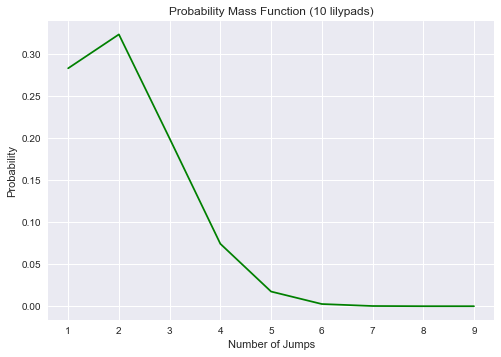

In [189]:
num_lilypads = 10
fig, ax = plt.subplots()
ax.plot(np.arange(1, num_lilypads), FrogPuzzle(num_lilypads).PMF(),  color='green')
plt.title('Probability Mass Function (10 lilypads)')
ax.set_xlabel('Number of Jumps')
ax.set_ylabel('Probability')
plt.show()

#### Reward Rt & Value Function for Chapter 1 Stock Price example1

In [1]:
from dataclasses import dataclass
from typing import Optional, Mapping, Tuple, Dict
import numpy as np
from scipy.stats import poisson
import itertools
from rl.distribution import Categorical, Constant, SampledDistribution
from rl.markov_process import MarkovRewardProcess
from rl.markov_process import RewardTransition
from rl.gen_utils.common_funcs import get_logistic_func

In [2]:
@dataclass(frozen=True)
class StateMP1:
    price: int

class StockPriceMRP1(MarkovRewardProcess[StateMP1]):
    
    level_param: int  
    alpha1: float = 0.25
    base_price: float
    poisson_lambda: float
    
    def transition_reward(
    self, state: StateMP1) -> SampledDistribution[Tuple[Categorical[StateMP1], float]]:
        
        def up_prob(self, state: StateMP1) -> float:
            return get_logistic_func(self.alpha1)(self.level_param - state.price)
    
        def sample_next_state_reward(state=state) -> Tuple[Categorical[StateMP1], float]:
            
            up_p = self.up_prob(state)
            
            # use poisson distribution to simulate the actual price
            actual_price: float = np.random.poisson(self.base_price)
            
            next_state: StateMP1 = Categorical({
            StateMP1(state.price + 1): up_p,
            StateMP1(state.price - 1): 1 - up_p
            })
            
            # reward is defined as the negative of the difference between expected
            # value of the state and the simulated actual price
            reward: float = -abs(np.float(StateMP1(state.price + 1)) * up_p +\
                               np.float(StateMP1(state.price + 1)) * (1 - up_p) -\
                               actual_price)
            
            return next_state, reward
           
            
        return SampledDistribution(sample_next_state_reward)
  